This file contains extensive comparison of run times between Kruskal's algorithm and Prim's algorithm for computing the minimum spanning tree (MST) of a weighted undirected graph. The two algorithms can be found in Graph_MST_library.py. In our version, kruskal runs in O($mlog(m) + mlog(n)$) where we managed to implement and union-find data structure and prim's runs in O($n^2$). This file contains comparisons and analysis in the following order:
1. Prim's run time check
2. Kruskal run time check
3. Dense Graph Comparison
4. Sparse Graph Comparison


Import libraries and test files.

In [1]:
import os
from Graph_MST_library import *
import time
import matplotlib.pyplot as plt

  
# PLEASE CHANGE THIS PATH TO WHERE THE TEST FIELS ARE STORED IN YOUR COMPUTER
path = r"C:\Users\Majd\Desktop\Middlebury\1- Midd Cources\4- Senior\1- Fall\CSCI 302\HWs\IPA-2\CS302_project_group\MST-Test-Files"

os.chdir(path)
  
files = []
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        f = open(file_path, 'r')
        files.append([str(file), f.readlines()])
        f.close()

## Prim's run time check

Our algorithm runs in O($n^2$). In theory, its run time should not be affected by whether the graph is dense or sparse or whether the weights are integers or real.

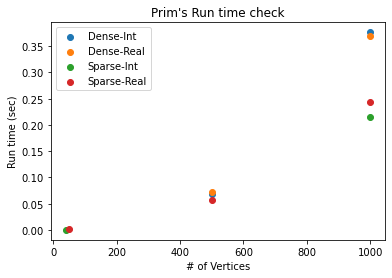

In [13]:
d_i_times = []
d_r_times = []
s_i_times = []
s_r_times = []
vdi = []
vdr = []
vsi = []
vsr = []

for file in files:
    name = file[0].split("-")
    file = file[1]
    if name[2] == "dense.txt":
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        g_2 = Graph_prim(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            g_2.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g_2.prim()
        # end time
        end = time.time()
        if name[0] == "Int":
            d_i_times.append(end-start)
            vdi.append(int(name[1]))
        else:
            d_r_times.append(end-start)
            vdr.append(int(name[1]))
    else:
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        g_2 = Graph_prim(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            g_2.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g_2.prim()
        # end time
        end = time.time()
        if name[0] == "Int":
            s_i_times.append(end-start)
            vsi.append(int(name[1]))
        else:
            s_r_times.append(end-start)
            vsr.append(int(name[1]))        
plt.figure(1)
plt.scatter(vdi, d_i_times)
plt.scatter(vdr, d_r_times)
plt.scatter(vsi, s_i_times)
plt.scatter(vsr, s_r_times)
plt.title("Prim's Run time check")
plt.xlabel("# of Vertices")
plt.ylabel("Run time (sec)")
plt.legend(["Dense-Int", "Dense-Real", "Sparse-Int", "Sparse-Real"])
plt.show()

We can see that all the 4 types of possible inputs can be fit by a polynomial of $n^2$ where n is the number of vertices, as expected. An interesting observation is that the dense inputs ran slower than the sparse inputs. This is possibly due to the fact that the condition statements in update_possible_vertices() and in find_min() don't run as much for the case of sparse graphs as it is likely that we won't satisfy the condition statements most of the times since we have an edge weight of inf for every pair vertices that have no edge between them. While the algorithm run faster for sparse graphs, it still runs in O($n^2$) for dense graphs, as expected.

## Kruskal's run time check

Kruskal's run in O($mlog(m) + mlog(n)$). We have not written our own sorting algorithm for it but used sorted() from python which runs in O($nlog(n)$). sorted() is using the sorting method Timsort. Timsort shouldn't run any different for integers and real numbers. If there is any difference in the run time for the two data types, it should be significant enough that it changes the run time of the sorting algorithm. The run time for Timsort is still O($nlog(n)) for both integers and reals.

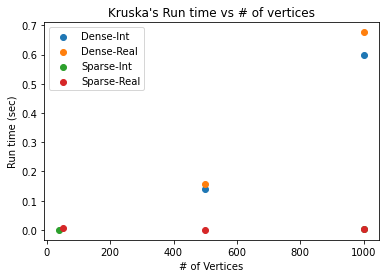

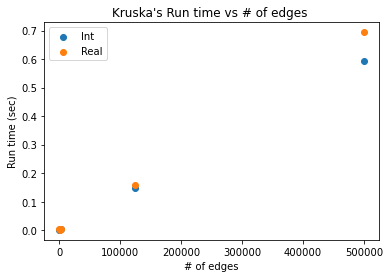

In [11]:
# here we consider the # of vertices
d_i_times = []
d_r_times = []
s_i_times = []
s_r_times = []
vdi = []
vdr = []
vsi = []
vsr = []

for file in files:
    name = file[0].split("-")
    file = file[1]
    if name[2] == "dense.txt":
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g.kruskal()
        # end time
        end = time.time()
        if name[0] == "Int":
            d_i_times.append(end-start)
            vdi.append(int(name[1]))
        else:
            d_r_times.append(end-start)
            vdr.append(int(name[1]))
    else:
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g.kruskal()
        # end time
        end = time.time()
        if name[0] == "Int":
            s_i_times.append(end-start)
            vsi.append(int(name[1]))
        else:
            s_r_times.append(end-start)
            vsr.append(int(name[1]))        
plt.figure(1)
plt.scatter(vdi, d_i_times)
plt.scatter(vdr, d_r_times)
plt.scatter(vsi, s_i_times)
plt.scatter(vsr, s_r_times)
plt.title("Kruska's Run time vs # of vertices")
plt.xlabel("# of Vertices")
plt.ylabel("Run time (sec)")
plt.legend(["Dense-Int", "Dense-Real", "Sparse-Int", "Sparse-Real"])
plt.show()


# here we consider number of edges
i_times = []
r_times = []
m_i = []
m_r = []

for file in files:
    name = file[0].split("-")
    file = file[1]
    if name[2] == "dense.txt":
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g.kruskal()
        # end time
        end = time.time()
        if name[0] == "Int":
            i_times.append(end-start)
            m_i.append(m)
        else:
            r_times.append(end-start)
            m_r.append(m)
    else:
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g.kruskal()
        # end time
        end = time.time()
        if name[0] == "Int":
            i_times.append(end-start)
            m_i.append(m)
        else:
            r_times.append(end-start)
            m_r.append(m)      
plt.figure(2)
plt.scatter(m_i, i_times)
plt.scatter(m_r, r_times)
plt.title("Kruska's Run time vs # of edges ")
plt.xlabel("# of edges")
plt.ylabel("Run time (sec)")
plt.legend(["Int", "Real"])
plt.show()

From the first figure, we can see that kruskal clearly runs better for sparse graph. This is expected when we look at time complexity formula as the two terms become close. In the dense graph case, m is on the order of O($n^2$) so the term $mlog(n)$ become small compared to the term $m log(m)$ and run time of the algorithm become $n^2log(n)$ which can be seen in the first graph. The second graph shows a relationship between m and the run time that is either linear of $mlog(m)$. It is hard to tell with the limited test cases we have.

## Dense graph comparison

 Kruskal's run in O($mlog(m) + mlog(n)$) and Prim's runs in O(n^2). For a dense graph m = O(n^2), so we expect Prim's to run faster than Kruskal's.

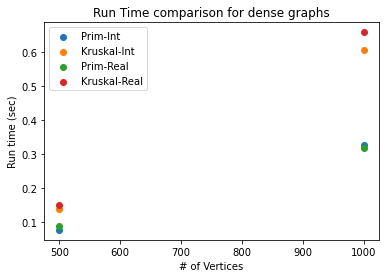

In [14]:
# Dense graph comparison
k_i_times = []
p_i_times = []
k_r_times = []
p_r_times = []
v_i = []
v_r = []

for file in files:
    name = file[0].split("-")
    file = file[1]
    if name[2] == "dense.txt":
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        g_2 = Graph_prim(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            g_2.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g.kruskal()
        # end time
        end = time.time()
        if name[0] == "Int":
            k_i_times.append(end-start)
            v_i.append(int(name[1]))
        else:
            k_r_times.append(end-start)
            v_r.append(int(name[1]))
        
        # starting time 
        start = time.time()
        cost, MST = g_2.prim()
        # end time
        end = time.time()
        if name[0] == "Int":
            p_i_times.append(end-start)
        else:
            p_r_times.append(end-start)
plt.figure(1)
plt.scatter(v_i, p_i_times)
plt.scatter(v_i, k_i_times)
plt.scatter(v_r, p_r_times)
plt.scatter(v_r, k_r_times)
plt.title("Run Time comparison for dense graphs")
plt.xlabel("# of Vertices")
plt.ylabel("Run time (sec)")
plt.legend(["Prim-Int", "Kruskal-Int", "Prim-Real", "Kruskal-Real"])
plt.show()

## Sparse Graph Comparison

Kruskal's run in O($mlog(m) + mlog(n)$) and Prim's runs in O(n^2). For a sparse graph we can make the approximation m = O(n), so we expect Kruskal's to run faster than Prim's.

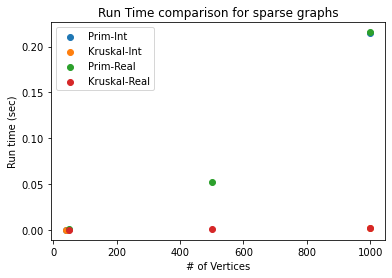

In [15]:
# sparse graph comparison
k_i_times = []
p_i_times = []
k_r_times = []
p_r_times = []
v_i = []
v_r = []
for file in files:
    name = file[0].split("-")
    file = file[1]
    if name[2] != "dense.txt":
        num_lines = len(file)
        # get n and m from first line
        g = file[0].split()
        n = int(g[0])
        m = int(g[1])
        # create a graph
        g = Graph_kruskal(n, m)
        g_2 = Graph_prim(n, m)
        # fill graph
        for i in range(1, num_lines-1):
            line = file[i].split()
            u = int(line[0])
            v = int(line[1])
            w = float(line[2])
            g.add_edge([u, v, w])
            g_2.add_edge([u, v, w])
            
        # starting time 
        start = time.time()
        cost, MST = g.kruskal()
        # end time
        end = time.time()
        if name[0] == "Int":
            k_i_times.append(end-start)
            v_i.append(int(name[1]))
        else:
            k_r_times.append(end-start)
            v_r.append(int(name[1]))
        
        # starting time 
        start = time.time()
        cost, MST = g_2.prim()
        # end time
        end = time.time()
        if name[0] == "Int":
            p_i_times.append(end-start)
        else:
            p_r_times.append(end-start)

plt.figure(2)
plt.scatter(v_i, p_i_times)
plt.scatter(v_i, k_i_times)
plt.scatter(v_r, p_r_times)
plt.scatter(v_r, k_r_times)
plt.title("Run Time comparison for sparse graphs")
plt.xlabel("# of Vertices")
plt.ylabel("Run time (sec)")
plt.legend(["Prim-Int", "Kruskal-Int", "Prim-Real", "Kruskal-Real"])
plt.show()